---
title: "Lecture 1: Shallow Foundations"
author: "Kevin Duffy"
subtitle: "TU Delft Offshore Geotechnics"
bibliography: ../bibliography.bib
draft: true
---

## Learning Objectives
- What are the differences between offshore and onshore shallow foundations?
- What geotechnical challenges do wind turbines pose when compared to oil rigs?
- What are the important things to check for the foundation’s capacity?


## Types of Shallow Foundations

### Gravity-based structures (GBS)
While the soft clays around the Gulf of Mexico reuqired long, deep piles, the dense sands and overconsolidated clays in the North Sea required alternative solutions as offshore development kicked off in the **YEAR**. Troll A was one of the early examples of this, located off the west coast of Norway. Weighing over a million tonnes, Troll A was perfectly suited for **MENTION SOIL** and the deep fjords around Norway made such a towing operation possible.

**THIS SECTION COULD BE REFINED A BIT NOW THAT LOADING IS EXPLAINED IN SECTION 1**


For offshore wind, gravity-based structures form a relatively small proportion of all foundations, amounting to roughly 5-10% of the offshore wind market **REF** and is mainly constrained by the amount of cost and feasibility of constructing such large foundations on a large scale, along with suitable ports for such a procedure. 
 
![Fecamp offshore wind farm, which entered service in May 2024](https://www.bouygues-construction.com/sites/default/files/fecanmp_0.jpg){#fig-fecamp width=70%}


### Skirted foundations

### Mudmats
Mudmats are generally wide steel plates, often providing temporary support like the for a jacket prior to pile installation (**FIG REF**) or for lighter, more flexible infrastructure. 

::: {#fig-mudmats layout-ncol=2}

![Underside of the jacket, showing a pile group and a skirted mudmat at each leg](pics/mudmats1.jpg)

![Upending the jacket, after "skidding" the jacket off the barge](pics/mudmats2.jpg){width=90%}

Installation of jacket (Photos from [Jan Berghuis](https://www.flickr.com/photos/mastermariner/))
:::

# Design principles

## Loads acting on shallow foundations
Recapping **Lesson ID**, 

One of most common formulations for shallow foundations came from Terzaghi **REF**, who assumed a Prandtl-type failure surface (@fig-prandtl) through perfectly plastic soil:

$$
q_{lim} = \frac{1}{2}  B  \gamma  N_\gamma + q  N_q + c' N_c
$$

where $B$ is the width of the foundation, $\gamma$ is the soil unit weight, $q$ **is the overburden pressure**, $c'$ is the effective cohesion and $N_\gamma$, $N_q$ and $N_c$ are factors.

 ![Prandtl failure mechanism of a shallow foundation](pics/prandtl.PNG){#fig-prandtl}

## Interaction diagrams

C:\Users\kduffy\AppData\Local\Temp\ipykernel_24464\2319713193.py:29: RuntimeWarning:

invalid value encountered in power



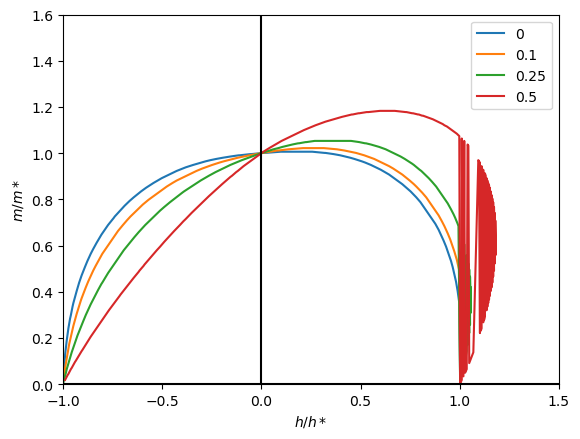

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def vulpe_2014_hm_plane(v, D, d, su_mudline, k):
    """
    Returns the failure surface in terms of h/h_star and m/m_star
    """
    # === Derived parameters ===
    su0 = su_mudline + k*d
    embedment_ratio = d / D

    # === Normalised load space ===
    n = 1000  # higher resolution for better contours
    h = np.linspace(-2, 2, n)
    m = np.linspace(-2, 2, n)
    h_grid, m_grid = np.meshgrid(h, m, indexing='ij')

    # === Fitting functions ===
    q = 4.69
    p = 2.12
    h_star = 1 - v**q
    m_star = 1 - v**p

    alpha = 2.28 - 1.03 * embedment_ratio if v > 0.5 else 2.55 - 1.43 * embedment_ratio
    beta  = 0.05 - 1.15 * embedment_ratio if v > 0.5 else -0.09 - 0.88 * embedment_ratio

    # === Failure function ===
    vals = (np.abs(h_grid / h_star) ** alpha
            + (m_grid / m_star) ** alpha
            + 2 * beta * ((h_grid * m_grid) / (h_star * m_star)))

    # === Extract points near failure surface ===
    tolerance = 0.001
    mask = np.abs(vals - 1) < tolerance
    h_vals = h_grid[mask]/h_star
    m_vals = m_grid[mask]/m_star

    return h_vals, m_vals

# === Inputs ===
D = 10  # Diameter [m]
# d = 5   # Embedment depth [m]
su_mudline = 20  # Undrained shear strength at mudline [kPa]
k = 5  # Shear strength gradient with depth [kPa/m]
v = 0.5 # Normalised vertical load

# === Plot ===
plt.figure()

for ratio in [0,0.1,0.25,0.5]:
    d = ratio*D
    x,y = vulpe_2014_hm_plane(v, D, d, su_mudline, k)
    plt.plot(x,y,label=str(ratio))

plt.xlabel("$h \slash h*$")
plt.ylabel("$m \slash m*$")
plt.xlim(-1,1.5)
plt.ylim(0,1.6)
plt.axhline(0,c="k")
plt.axvline(0,c="k")
plt.legend()

# # === Plot: contour where failure function == 1 ===
# plt.figure(figsize=(8, 6))
# contour = plt.contour(h/h_star, m/m_star, vals, levels=[1], colors='crimson')
# plt.clabel(contour, fmt="Failure Envelope")


# plt.title(f"2D Failure Envelope at V′ = {v_fixed}")
# plt.show()


## An example of a video...
A suction caisson

{{< video <iframe width="560" height="315" src="https://www.youtube.com/embed/RNaMLbshYw4?si=9E-nNfaaJfCXYT4a&amp;start=47" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe> >}}